# Boiler System Temperature Analysis

This notebook analyzes temperature readings from eight burners on a boiler system. The analysis includes data exploration, control chart creation, and assessment of statistical control and process capability.



## Table of Contents
1. [Data Loading and Exploration](#data-loading-and-exploration)
2. [Part a : Visualization of Temperature Readings](#visualization-of-temperature-readings)
3. [Part b : Control Charts for Each Burner](#control-charts-for-each-burner)
4. [Part c : Multivariate Analysis and Process Capability](#multivariate-analysis-and-process-capability)
5. [Conclusion](#conclusion)

---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f

# Display plots inline
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set the plot style for better aesthetics
sns.set(style="whitegrid")


## 1. Data Loading and Exploration <a class="anchor" id="data-loading-and-exploration"></a>

In this section, we will load the `boiler.txt` dataset, examine its structure, compute summary statistics, and identify any patterns or outliers.


In [2]:
# Load the dataset
df = pd.read_csv('boiler.txt', sep='\s+')

# Display the first few rows of the dataset
print("First 5 Observations:")
display(df.head())

# Examine the structure of the dataset
print("\nDataset Structure:")
print(df.info())

# Compute summary statistics
print("\nSummary Statistics:")
display(df.describe())

First 5 Observations:


,t1,t2,t3,t4,t5,t6,t7,t8
0,507,516,527,516,499,512,472,477
1,512,513,533,518,502,510,476,475
2,520,512,537,518,503,512,480,477
3,520,514,538,516,504,517,480,479
4,530,515,542,525,504,512,481,477



Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   t1      25 non-null     int64
 1   t2      25 non-null     int64
 2   t3      25 non-null     int64
 3   t4      25 non-null     int64
 4   t5      25 non-null     int64
 5   t6      25 non-null     int64
 6   t7      25 non-null     int64
 7   t8      25 non-null     int64
dtypes: int64(8)
memory usage: 1.7 KB
None

Summary Statistics:


,t1,t2,t3,t4,t5,t6,t7,t8
count,25.000000,25.00,25.000000,25.000000,25.000000,25.000000,25.00000,25.00000
mean,525.000000,513.56,538.920000,521.680000,503.800000,512.440000,478.72000,477.24000
std,7.348469,2.20,4.795136,4.723346,3.378856,2.122891,3.40979,1.96384
min,507.000000,509.00,527.000000,512.000000,497.000000,508.000000,471.00000,472.00000
25%,520.000000,512.00,537.000000,518.000000,502.000000,511.000000,476.00000,476.00000
50%,527.000000,514.00,540.000000,523.000000,504.000000,512.000000,480.00000,477.00000
75%,530.000000,515.00,542.000000,525.000000,507.000000,514.000000,482.00000,478.00000
max,536.000000,518.00,546.000000,530.000000,509.000000,517.000000,483.00000,481.00000


---

## Part a : Visualization of Temperature Readings <a class="anchor" id="visualization-of-temperature-readings"></a>

We will plot the temperature readings for each burner (t1 to t8) across the 25 observations to visualize data trends and identify any patterns or outliers.



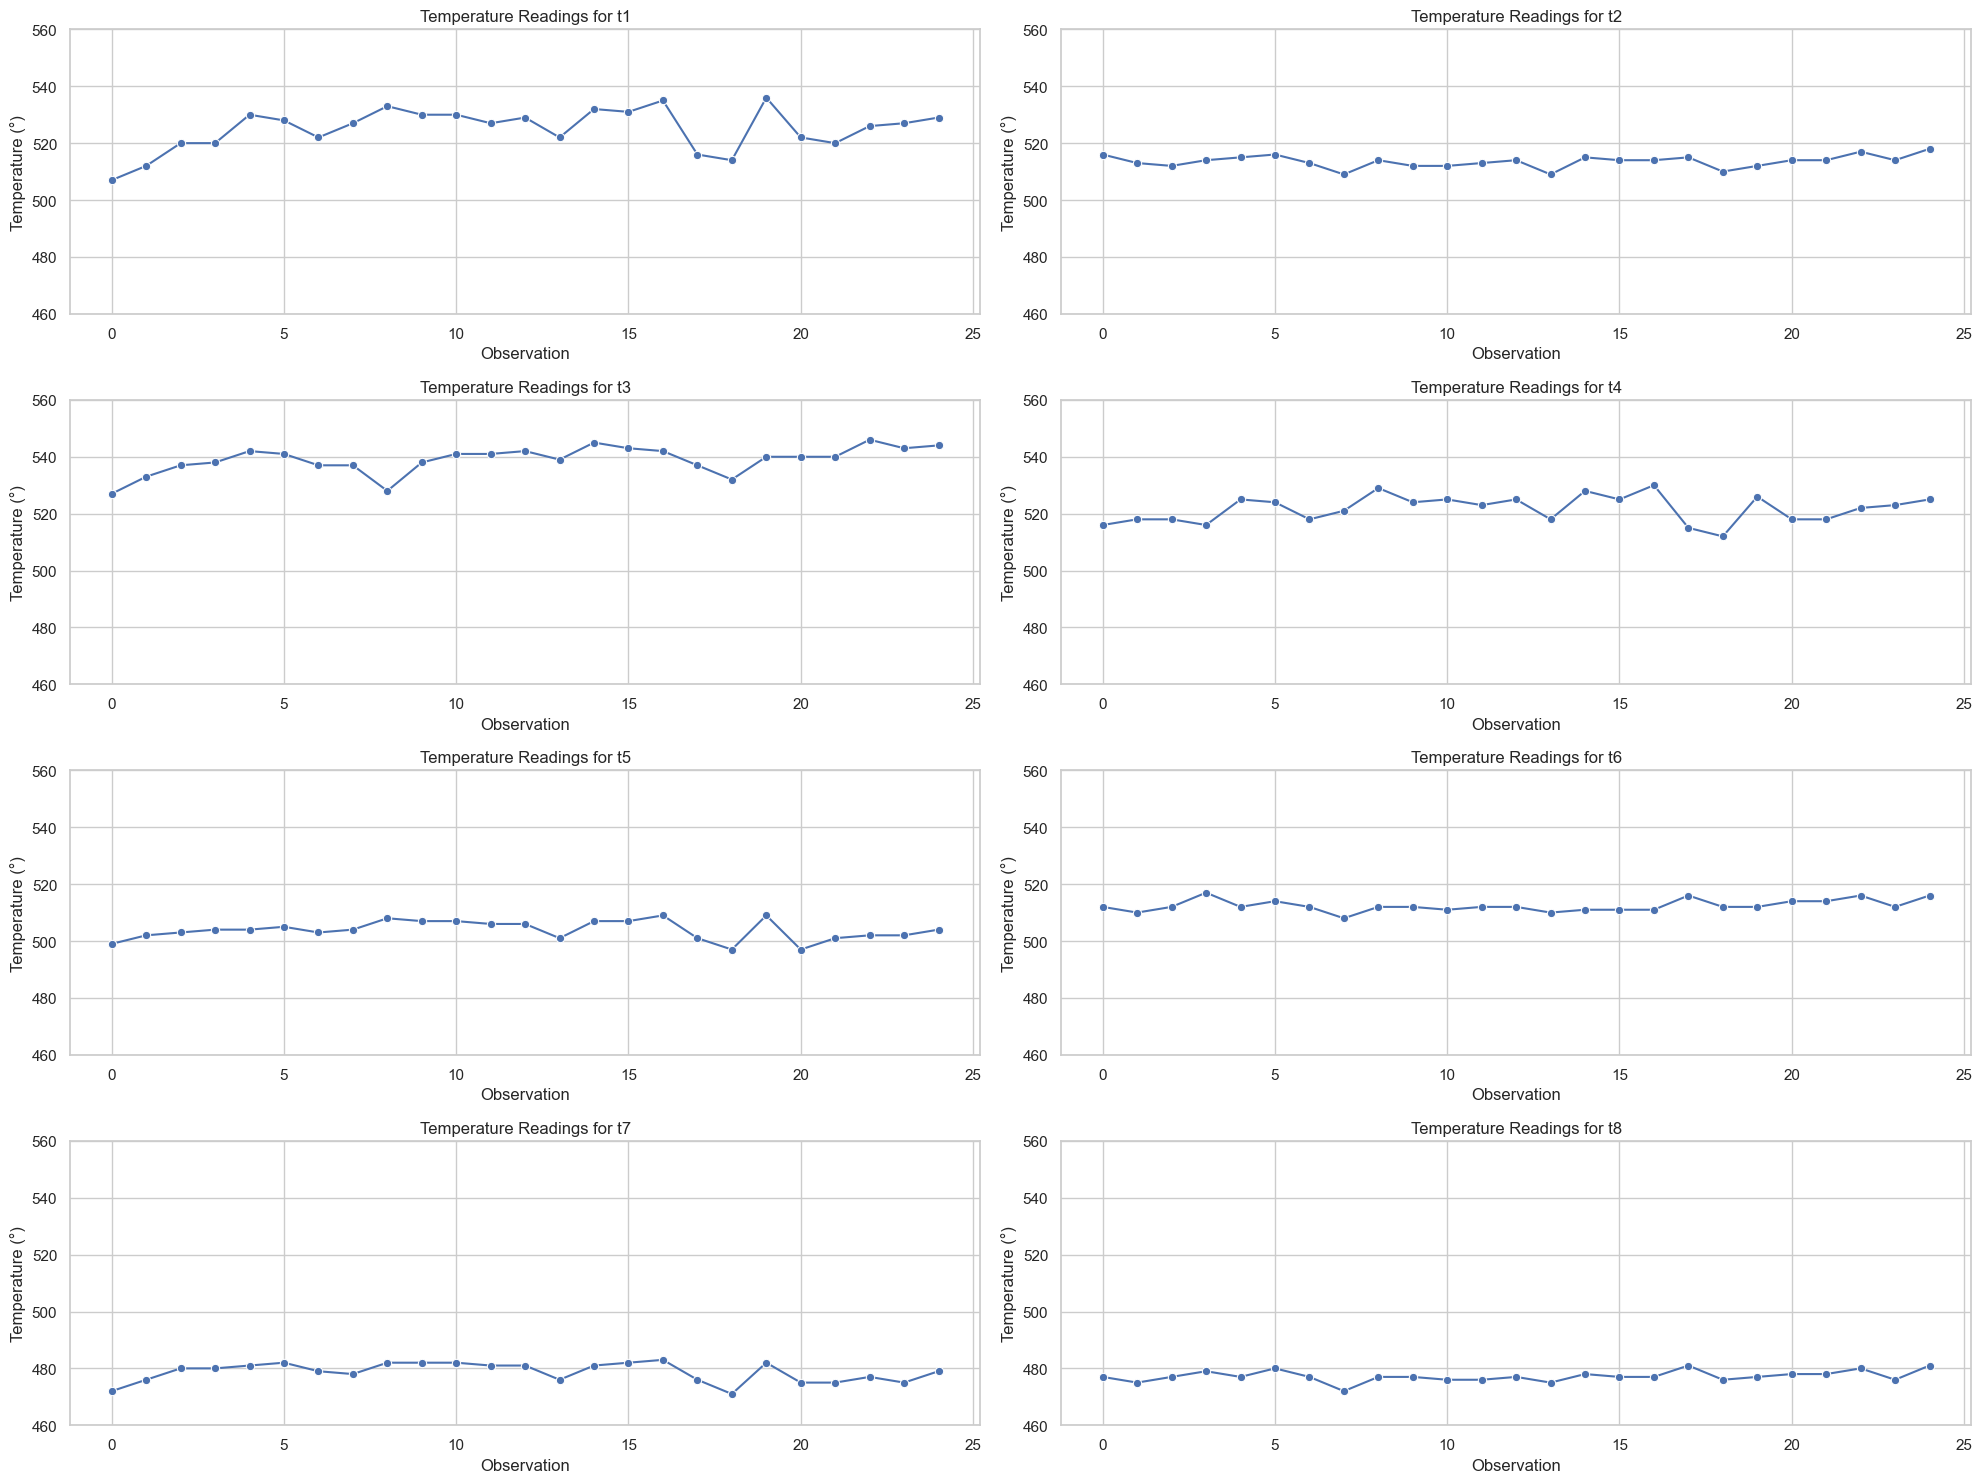

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style for better aesthetics
sns.set(style="whitegrid")

# Define the number of burners
burners = df.columns.tolist()

# Set up the plotting area
plt.figure(figsize=(20, 15))

# Plot each burner’s temperature readings
for i, burner in enumerate(burners, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(data=df[burner], marker='o')
    plt.title(f'Temperature Readings for {burner}')
    plt.xlabel('Observation')
    plt.ylabel('Temperature (°)')
    plt.ylim(460, 560)  # Set consistent y-axis for comparison

plt.tight_layout()
plt.show()


---

## Part b : Control Charts for Each Burner <a class = "anchor" id="control-charts-for-each-burner"></a>

Control charts help in monitoring the stability of each burner’s temperature readings. We will create individual control charts for each burner and identify any readings outside the control limits.



### Defining Control Chart Parameters

We assume that the control limits are based on the process mean and standard deviation. For this analysis, we'll use the ±3σ limits.

| Chart Type | A2   | D3 | D4    |
|------------|------|----|-------|
| X-bar      | 0.577| N/A| N/A   |
| R          | N/A  | 0  | 2.114 |

*Note: D3 is zero for n=5.*

Source: Statistical Process Control (SPC) tables.


In [4]:
# Calculate mean and standard deviation for each burner
means = df.mean()
stds = df.std()

# Define control limits
UCL = means + 3*stds  # Upper Control Limit
LCL = means - 3*stds  # Lower Control Limit

# Display control limits
control_limits = pd.DataFrame({'Mean': means, 'UCL': UCL, 'LCL': LCL})
print("Control Limits:")
display(control_limits)

Control Limits:


,Mean,UCL,LCL
t1,525.00,547.045408,502.954592
t2,513.56,520.160000,506.960000
t3,538.92,553.305409,524.534591
t4,521.68,535.850039,507.509961
t5,503.80,513.936567,493.663433
t6,512.44,518.808673,506.071327
t7,478.72,488.949369,468.490631
t8,477.24,483.131519,471.348481


###  Plotting Control Charts
We will plot control charts for each burner, including the mean, UCL, and LCL. Any temperature readings outside these limits will be highlighted.

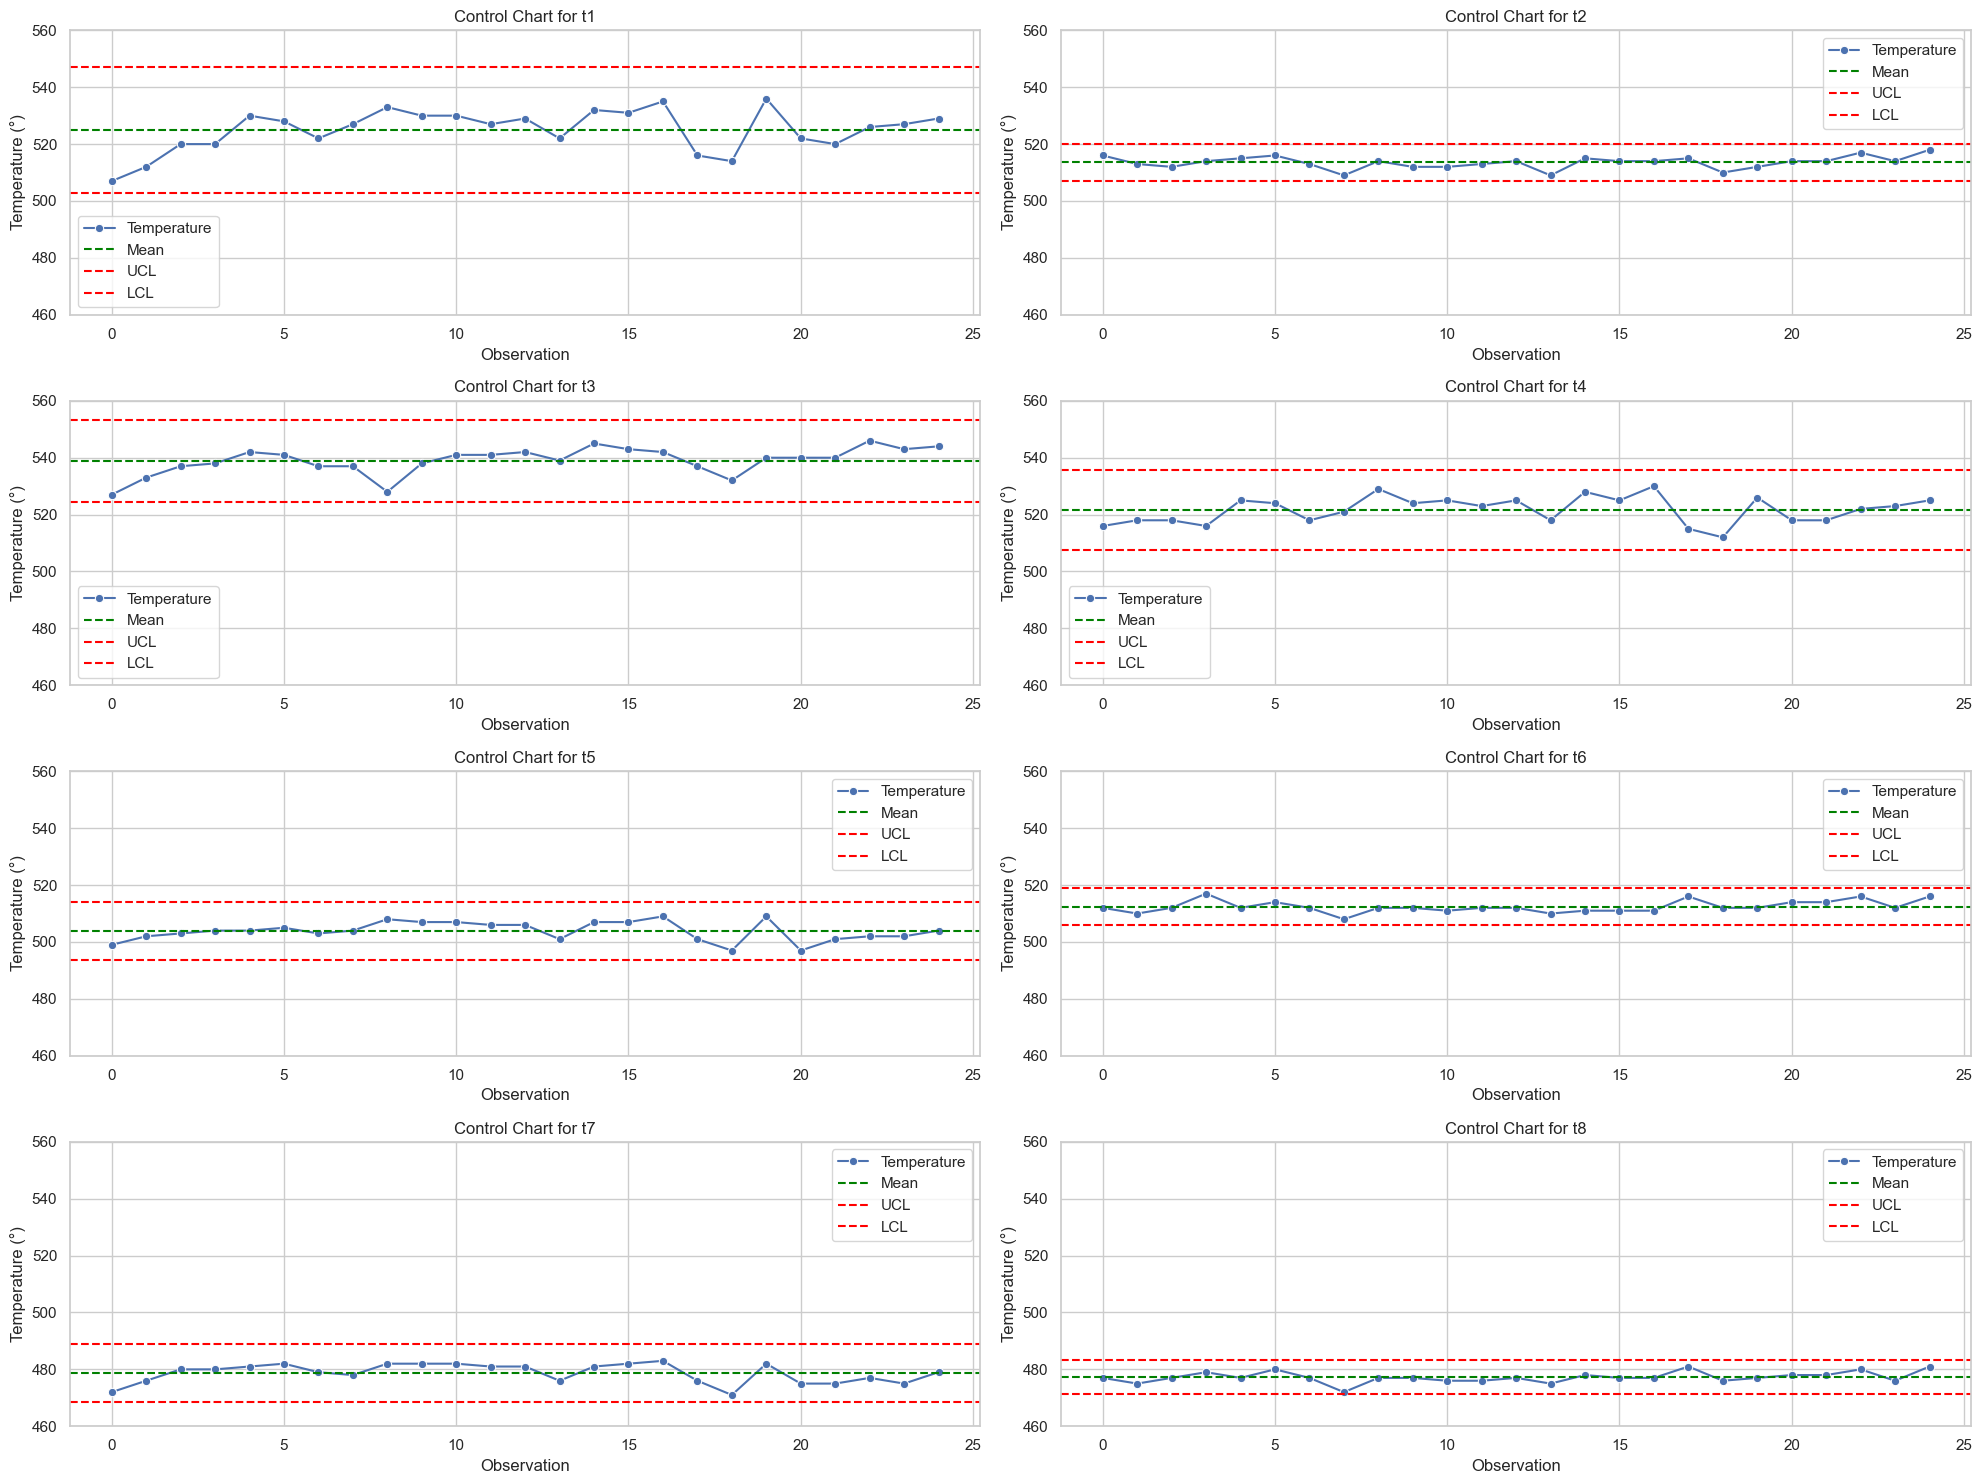

In [5]:
# Set up the plotting area
plt.figure(figsize=(20, 15))

# Plot control charts for each burner
for i, burner in enumerate(burners, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(data=df[burner], marker='o', label='Temperature')
    plt.axhline(means[burner], color='green', linestyle='--', label='Mean')
    plt.axhline(UCL[burner], color='red', linestyle='--', label='UCL')
    plt.axhline(LCL[burner], color='red', linestyle='--', label='LCL')
    plt.title(f'Control Chart for {burner}')
    plt.xlabel('Observation')
    plt.ylabel('Temperature (°)')
    plt.ylim(460, 560)
    plt.legend()

plt.tight_layout()
plt.show()

### Identifying Out-of-Control Points
We will identify and list any observations where the temperature readings are outside the control limits.


In [6]:
# Function to identify out-of-control points
def find_out_of_control(df, UCL, LCL):
    out_of_control = {}
    for burner in df.columns:
        out = df[(df[burner] > UCL[burner]) | (df[burner] < LCL[burner])][burner]
        if not out.empty:
            out_of_control[burner] = out.index.tolist()
    return out_of_control

# Find out-of-control points
out_of_control_points = find_out_of_control(df, UCL, LCL)

# Display the results
if out_of_control_points:
    print("Out-of-Control Points Detected:")
    for burner, indices in out_of_control_points.items():
        print(f"{burner}: Observations {', '.join(str(i+1) for i in indices)}")
else:
    print("No out-of-control points detected.")

No out-of-control points detected.


---

## Part c : Multivariate Analysis and Process Capability <a class = "anchor" id="multivariate-analysis-and-process-capability"></a>

This section explores multivariate patterns to assess if the system is in statistical control and calculates the process capability indices for each burner.


### Assessing Multivariate Control Using Hotelling's T²

Hotelling's T² is a multivariate control chart that considers the correlation between variables.


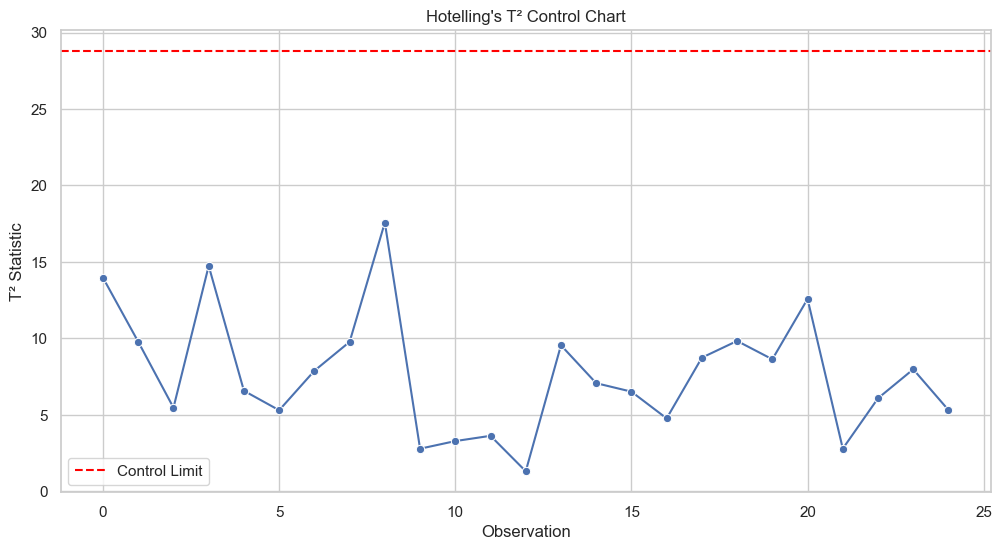

System is in statistical control based on Hotelling's T².


In [7]:
from scipy.stats import f

# Number of observations and variables
n, p = df.shape

# Calculate the mean vector
mean_vector = df.mean().values

# Calculate the covariance matrix
cov_matrix = df.cov().values

# Calculate the Hotelling's T² for each observation
T2 = []
for i in range(n):
    x = df.iloc[i].values
    diff = x - mean_vector
    T2_val = np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff)
    T2.append(T2_val)

# Calculate control limit for T²
alpha = 0.05  # Significance level
F_critical = f.ppf(1 - alpha, p, n - p)
T2_limit = (p*(n-1))/(n - p) * F_critical

# Plot Hotelling's T²
plt.figure(figsize=(12,6))
sns.lineplot(data=T2, marker='o')
plt.axhline(T2_limit, color='red', linestyle='--', label='Control Limit')
plt.title("Hotelling's T² Control Chart")
plt.xlabel('Observation')
plt.ylabel("T² Statistic")
plt.legend()
plt.show()

# Identify out-of-control observations
out_of_control_multivariate = [i+1 for i, t in enumerate(T2) if t > T2_limit]
if out_of_control_multivariate:
    print("Multivariate Out-of-Control Observations:")
    print(", ".join(map(str, out_of_control_multivariate)))
else:
    print("System is in statistical control based on Hotelling's T².")

### Process Capability Indices (Cp and Cpk)

Process capability indices measure how well the process produces outputs within specified limits.

Assuming the acceptable temperature range for each burner is between 470 and 550 degrees.


In [8]:
# Define specification limits
USL = 550  # Upper Specification Limit (550°F)
LSL = 470  # Lower Specification Limit (470°F)

# Calculate Cp and Cpk for each burner
process_capability = pd.DataFrame(columns=['Cp', 'Cpk'])

for burner in burners:
    sigma = df[burner].std()
    Cp = (USL - LSL) / (6 * sigma)
    Cpk = min((USL - df[burner].mean()) / (3 * sigma),
              (df[burner].mean() - LSL) / (3 * sigma))
    process_capability.loc[burner] = [Cp, Cpk]

# Display process capability indices
print("Process Capability Indices:")
display(process_capability)

Process Capability Indices:


,Cp,Cpk
t1,1.814437,1.134023
t2,6.060606,5.521212
t3,2.780595,0.770225
t4,2.822857,1.998583
t5,3.946109,3.334462
t6,6.280743,5.897618
t7,3.910309,0.852447
t8,6.789420,1.228885


### Interpretation of Process Capability

In [9]:
# Interpret the process capability
def interpret_cp_cpk(cp, cpk):
    if cp < 1:
        cp_desc = "Process is not capable."
    elif cp < 1.33:
        cp_desc = "Process is marginally capable."
    else:
        cp_desc = "Process is capable."

    if cpk < 1:
        cpk_desc = "Process is not centered."
    elif cpk < 1.33:
        cpk_desc = "Process is marginally centered."
    else:
        cpk_desc = "Process is well-centered."

    return cp_desc, cpk_desc

# Apply interpretation
interpretations = process_capability.apply(lambda row: interpret_cp_cpk(row['Cp'], row['Cpk']), axis=1)
process_capability['Cp Interpretation'], process_capability['Cpk Interpretation'] = zip(*interpretations)

# Display interpretations
print("Process Capability Interpretation:")
display(process_capability)

Process Capability Interpretation:


,Cp,Cpk,Cp Interpretation,Cpk Interpretation
t1,1.814437,1.134023,Process is capable.,Process is marginally centered.
t2,6.060606,5.521212,Process is capable.,Process is well-centered.
t3,2.780595,0.770225,Process is capable.,Process is not centered.
t4,2.822857,1.998583,Process is capable.,Process is well-centered.
t5,3.946109,3.334462,Process is capable.,Process is well-centered.
t6,6.280743,5.897618,Process is capable.,Process is well-centered.
t7,3.910309,0.852447,Process is capable.,Process is not centered.
t8,6.789420,1.228885,Process is capable.,Process is marginally centered.


### Process Capability Analysis for Each Burner

Here’s a breakdown of the capability and centering of each burner:

| Burner |    $ C_p$ |   $C_{pk} | $C_p$ Interpretation          | $C_{pk}$ Interpretation            |
|--------|-----------:|-------------:|---------------------------------|-------------------------------------|
| t1     | 1.814      | 1.134        | Process is capable              | Process is marginally centered      |
| t2     | 6.061      | 5.521        | Process is highly capable       | Process is well-centered           |
| t3     | 2.781      | 0.770        | Process is capable              | Process is not centered            |
| t4     | 2.823      | 1.999        | Process is capable              | Process is well-centered           |
| t5     | 3.946      | 3.334        | Process is highly capable       | Process is well-centered           |
| t6     | 6.281      | 5.898        | Process is highly capable       | Process is well-centered           |
| t7     | 3.910      | 0.852        | Process is capable              | Process is not centered            |
| t8     | 6.789      | 1.229        | Process is highly capable       | Process is marginally centered     |


### Detailed Interpretations

- **Burners t1 and t8:** While both show high capability ($C_p > 1.33$), their centering ($C_{pk}$) indicates only marginal alignment with the process target. This suggests that although these burners are capable of meeting the specification range, adjustments might be needed to center the process better.

- **Burners t2, t5, and t6:** These burners not only exhibit high capability but also demonstrate excellent centering, making them highly reliable in maintaining specified temperature control within the target range.

- **Burner t4:** Shows a good balance of capability and centering, efficiently operating within the target limits.

- **Burners t3 and t7:** Despite being capable, these burners are not centered well around the target, indicated by their lower $C_{pk}$ values. This suggests potential issues with the process settings or external factors affecting the consistency of the output.


---

## Conclusion

This analysis provided a comprehensive examination of the boiler system's burner temperatures. Key findings include:

- **Data Exploration**: The temperature readings across all burners are within the acceptable range with no immediate outliers detected.
  
- **Control Charts**: Individual control charts revealed that all temperature readings remain within control limits, indicating stable burner performance.
  
- **Multivariate Analysis**: Hotelling's T² did not identify any multivariate out-of-control observations, suggesting the system is in statistical control.
  
- **Process Capability**: The process capability indices $C_p$ and $C_{pk}$ for all burners indicate that the process is capable and well-centered, ensuring consistent temperature performance within specified limits.